### Import packages


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
import joblib

Import dataset (We will use the smaller one first)

In [3]:
data = pd.read_csv("../data/50k-sample-song-features.csv", index_col = 0)
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,11NFxVnEwPDz4LjIyKazxV,Allein sein,['Mario Novembre'],0.690,0.522,9,-8.108,1,0.0541,0.13000,0.000000,0.1100,0.511,155.048,audio_features,spotify:track:11NFxVnEwPDz4LjIyKazxV,https://api.spotify.com/v1/tracks/11NFxVnEwPDz...,https://api.spotify.com/v1/audio-analysis/11NF...,180387,4
1,5QEqzFV7R8KSSCJa37tfvs,Leere Hände (feat. Sido & Samra),"['SANTOS', 'Sido', 'Samra']",0.683,0.699,8,-4.519,0,0.2180,0.25200,0.000000,0.2180,0.315,160.102,audio_features,spotify:track:5QEqzFV7R8KSSCJa37tfvs,https://api.spotify.com/v1/tracks/5QEqzFV7R8KS...,https://api.spotify.com/v1/audio-analysis/5QEq...,169191,4
2,0b18g3G5spr4ZCkz7Y6Q0Q,Rasputin,"['Majestic', 'Boney M.']",0.758,0.913,6,-2.926,0,0.1130,0.00364,0.000069,0.1930,0.658,128.040,audio_features,spotify:track:0b18g3G5spr4ZCkz7Y6Q0Q,https://api.spotify.com/v1/tracks/0b18g3G5spr4...,https://api.spotify.com/v1/audio-analysis/0b18...,186210,4
3,58GxgFEG5uHc9oMhofuuIP,Drei Uhr Nachts,"['Mark Forster', 'LEA']",0.663,0.673,8,-7.031,1,0.1190,0.06010,0.000014,0.1910,0.759,164.817,audio_features,spotify:track:58GxgFEG5uHc9oMhofuuIP,https://api.spotify.com/v1/tracks/58GxgFEG5uHc...,https://api.spotify.com/v1/audio-analysis/58Gx...,161001,4
4,0ZqL6UhrqydZE4DaXvCMeT,Liege wieder wach,['Jamule'],0.743,0.599,11,-9.125,1,0.0614,0.33900,0.000003,0.0897,0.436,82.017,audio_features,spotify:track:0ZqL6UhrqydZE4DaXvCMeT,https://api.spotify.com/v1/tracks/0ZqL6UhrqydZ...,https://api.spotify.com/v1/audio-analysis/0ZqL...,176251,4


#### Extract the numerical features we want to use. 

In [4]:
X = data.loc[:,'danceability':'valence'].drop(['mode'], axis = 1)

In [5]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence'],
      dtype='object')

In [6]:
scaler = StandardScaler().fit(X)

### Saving the scaler in a file

In [7]:
joblib.dump(scaler, '../data/model/std_scaler.bin', compress=True)

['../data/model/std_scaler.bin']

In [8]:
X_prep = scaler.transform(X)

In [9]:
X_prep_df = pd.DataFrame(X_prep, columns=X.columns)

#### Dataframe transformed

In [10]:
X_prep_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.646217,-0.009625,1.065826,0.349455,-0.267625,-0.830944,-0.572029,-0.423145,0.163290
1,0.609356,0.633849,0.784109,0.870324,1.681179,-0.493100,-0.572029,0.387304,-0.565042
2,1.004294,1.411834,0.220674,1.101515,0.432708,-1.180862,-0.571828,0.199700,0.709539
3,0.504039,0.539327,0.784109,0.505759,0.504049,-1.024512,-0.571990,0.184692,1.084853
4,0.925306,0.270304,1.629261,0.201859,-0.180827,-0.252178,-0.572021,-0.575480,-0.115408
...,...,...,...,...,...,...,...,...,...
49519,0.093304,0.582953,-0.342761,0.401121,-0.484027,-0.931190,-0.571958,-0.047937,-0.327219
49520,0.330266,0.593859,-1.187913,0.696024,-0.003663,-0.091563,-0.330479,-0.370616,0.601775
49521,-0.180520,1.397292,1.347543,0.640004,-0.122565,-0.304793,-0.568266,3.479021,-0.851172
49522,0.288140,0.888330,-1.469630,0.971479,-0.519698,-0.717406,-0.572029,0.462346,0.471716


### Fitting the model 

In [12]:
kmeans = KMeans(n_clusters=100, random_state=666, n_jobs=-1)
kmeans.fit(X_prep_df)

C:\Users\asomm\anaconda3\envs\excondables\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=100, n_jobs=-1, random_state=666)

#### also saving it for later use

In [11]:
joblib.dump(kmeans,"../data/model/kmeans_model.sav")

['../data/model/kmeans_model.sav']

In [12]:
kmeans.cluster_centers_

array([[ 8.44041098e-01, -3.48903226e-01,  7.61640411e-01,
        -1.15007292e-01, -1.17673812e-01, -7.03563974e-01,
         1.78099398e+00, -3.78362186e-01, -3.02027910e-01],
       [ 7.75327663e-01,  1.01484242e+00,  1.25606482e+00,
         7.20617203e-01, -1.29775803e-01, -8.47694568e-01,
        -5.17226639e-01,  1.08893788e+00,  1.15587637e+00],
       [-7.90360673e-01, -1.60544136e+00, -1.15269793e+00,
        -1.94027839e+00, -3.57249847e-01,  1.47348350e+00,
         2.00066219e+00, -4.07477930e-01, -9.39285771e-01],
       [ 9.20939159e-01,  9.11487180e-01, -1.04489636e+00,
         7.35510986e-01,  1.43986284e+00, -7.03362886e-01,
        -5.38390472e-01, -4.10475429e-01,  1.13063146e+00],
       [-1.25377747e-01, -1.17741515e+00, -1.17035514e+00,
        -5.11682787e-01, -4.24616493e-01,  1.18387213e+00,
        -4.96698755e-01, -3.82582596e-01, -7.20153185e-01],
       [-1.05591958e-01, -4.45031159e-01,  1.26457682e+00,
         2.23212219e-01, -4.26045229e-01,  7.819500

In [13]:
kmeans.inertia_

72624.951596509

In [14]:
clusters = kmeans.predict(X_prep)
len(clusters)

49524

In [15]:
pd.Series(clusters).value_counts().sort_index()

0     326
1     619
2     576
3     457
4     706
     ... 
95    699
96    622
97    209
98    301
99    503
Length: 100, dtype: int64

In [16]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,cluster
0,0.690,0.522,9,-8.108,0.0541,0.13000,0.000000,0.1100,0.511,67
1,0.683,0.699,8,-4.519,0.2180,0.25200,0.000000,0.2180,0.315,78
2,0.758,0.913,6,-2.926,0.1130,0.00364,0.000069,0.1930,0.658,11
3,0.663,0.673,8,-7.031,0.1190,0.06010,0.000014,0.1910,0.759,74
4,0.743,0.599,11,-9.125,0.0614,0.33900,0.000003,0.0897,0.436,67
...,...,...,...,...,...,...,...,...,...,...
49519,0.585,0.685,4,-7.752,0.0359,0.09380,0.000024,0.1600,0.379,50
49520,0.630,0.688,1,-5.720,0.0763,0.39700,0.082800,0.1170,0.629,96
49521,0.533,0.909,10,-6.106,0.0663,0.32000,0.001290,0.6300,0.238,36
49522,0.622,0.769,0,-3.822,0.0329,0.17100,0.000000,0.2280,0.594,26


In [17]:
#We do an id-cluster dataframe
id_cluster = pd.concat([X_df['cluster'],data[['artists','name','id']]],axis = 1)


In [18]:
id_cluster.to_csv("../data/model/cluster-id-dataframe.csv")

Text(0, 0.5, 'inertia')

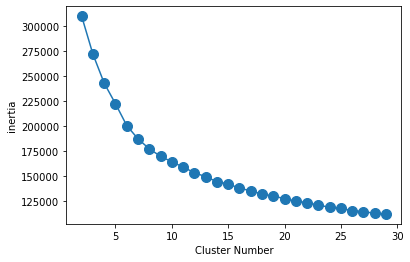

In [20]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=666,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(2,30)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

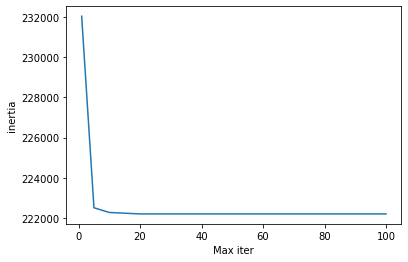

In [21]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=5,
                    random_state=666,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

In [22]:
from sklearn.metrics import silhouette_score

K = range(2, 30)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=666)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


Text(0, 0.5, 'silhouette score')

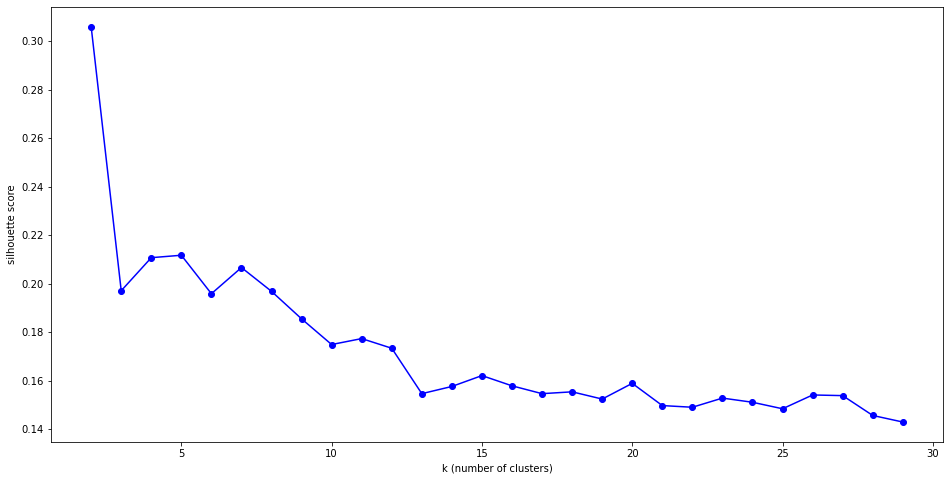

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [25]:
K = range(10, 100)

silhouettes = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                   random_state=666)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

  0%|          | 0/90 [00:00<?, ?it/s]

MemoryError: Unable to allocate 1.00 GiB for an array with shape (2710, 49524) and data type float64

This score kept reducing, and to classify songs and get related songs, i think the clusters should be pretty numerous, as is the nuances of so many samples of songs. Trying with 100 clusters for the final program showed more similarities between our input and the recommendation, so i decidedto go with that.  

In [ ]:
km = KMeans(n_clusters=24, random_state=666)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_prep)